# **Recognizing hand-written digits using LDA**

**About dataset:**
            The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

1) Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning.


2) LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes.

STEPS TO BE PERFORMED:

1) import the libraries

2) data loading

3) EDA

4) STANDARDISING

5) x and y and train and test

6) Model building

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [ ]:
digits = datasets.load_digits()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
data1 = pd.DataFrame(digits.data)

In [ ]:
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y = pd.DataFrame(digits.target, columns=["target"])

In [ ]:
y

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


0


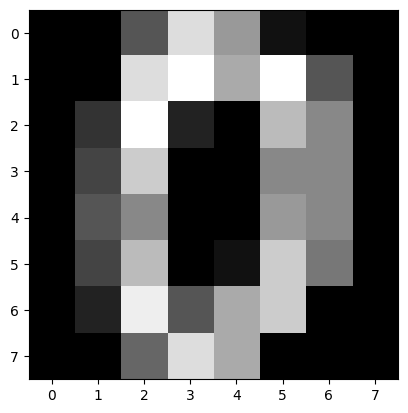

1


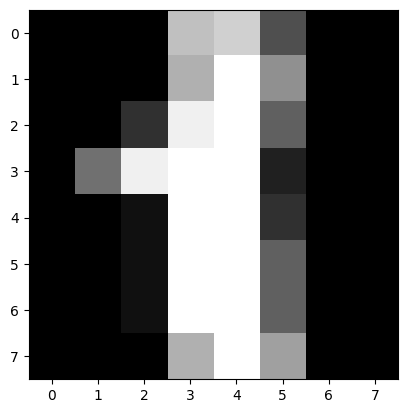

2


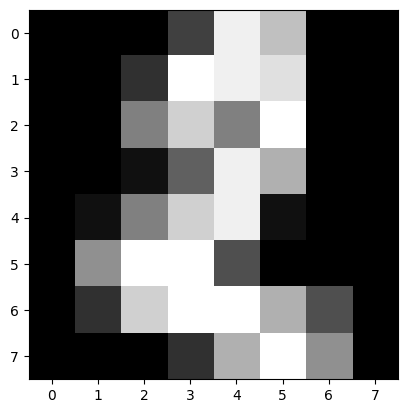

3


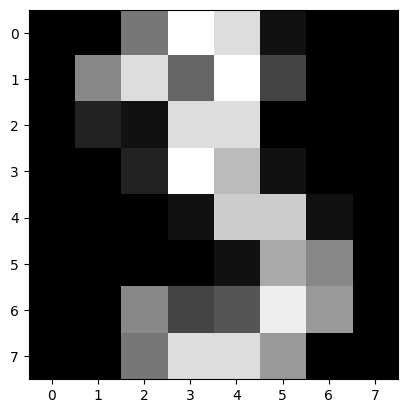

4


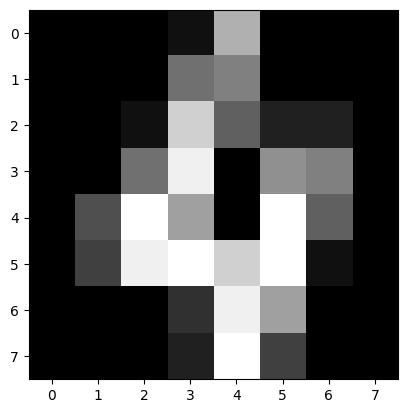

5


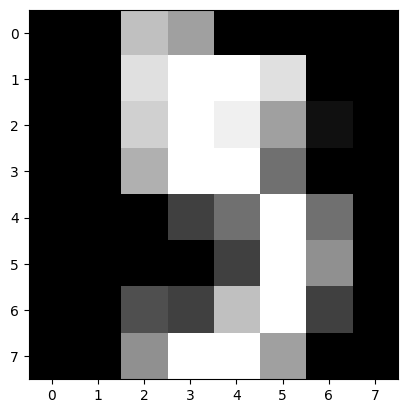

6


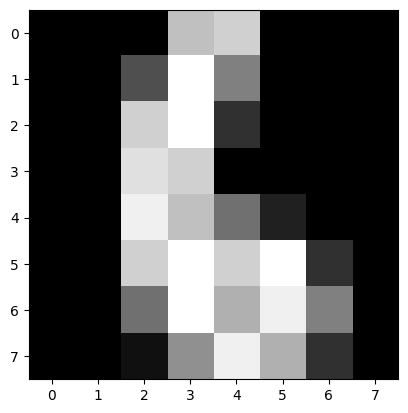

7


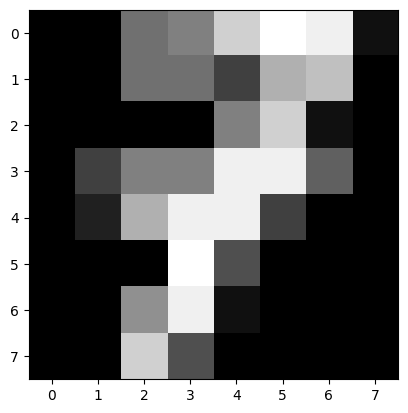

8


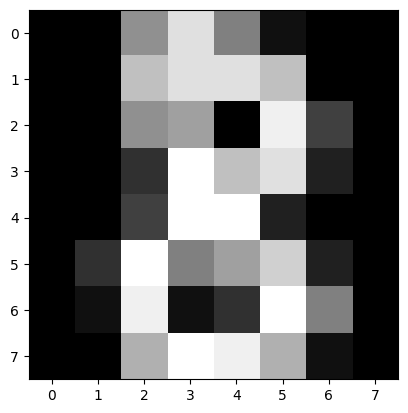

9


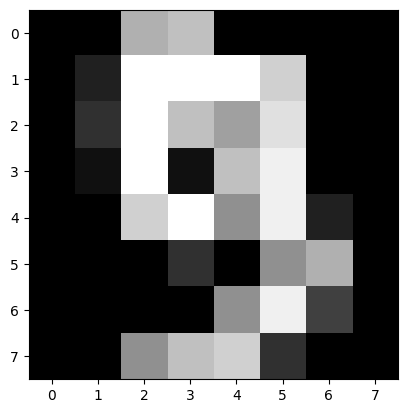

In [ ]:
for i in range(10):
  print(i)
  plt.imshow(digits.images[i],cmap=plt.cm.gray)
  plt.show()

In [ ]:
x = digits.data
y = digits.target

In [ ]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#feature scaling
# mean = 0, standard deviation = 1
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
#LDA

lda = LinearDiscriminantAnalysis(n_components= 9)
x_lda = lda.fit_transform(x_scaled,y)
x_lda.shape

(1797, 9)

In [ ]:
# #LDA

# lda = LinearDiscriminantAnalysis()
# x_lda = lda.fit_transform(x_scaled,y)
# x_lda.shape

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_lda,y,test_size=0.20)

In [ ]:
x_lda

array([[-2.01463220e+00, -5.62348616e+00, -1.86594028e-01, ...,
         1.09348511e-01,  1.83506669e-01,  9.65495420e-01],
       [ 2.20967396e-01,  3.59240033e+00,  2.14901657e+00, ...,
         1.23115093e-01,  3.39210556e+00, -1.20766919e+00],
       [ 2.23485453e+00,  2.70950363e+00,  4.26992781e+00, ...,
        -2.51256615e+00, -1.08370006e+00,  4.22490736e-03],
       ...,
       [-1.04697178e+00,  1.48367733e+00,  3.04170263e+00, ...,
        -1.54913444e+00, -1.99315402e+00,  2.17737830e+00],
       [ 4.07872916e-01, -1.99167301e+00, -3.65835518e-01, ...,
        -9.16595358e-01, -5.26856349e-01, -1.41509141e+00],
       [ 1.74145011e-01,  8.87174627e-01,  1.37776831e+00, ...,
         5.14965352e-02, -3.18833067e+00,  6.91242304e-01]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf =  RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
print(y_pred)

[3 3 3 0 5 0 1 5 2 1 5 7 9 9 1 2 0 4 7 1 8 8 4 5 7 6 2 1 4 8 3 6 5 4 0 4 8
 0 2 4 4 4 0 1 9 5 5 8 2 3 0 8 1 8 2 2 4 8 9 2 8 9 4 9 1 2 1 5 0 6 1 2 9 6
 5 2 5 6 5 8 2 0 7 9 3 9 5 4 0 2 9 8 2 6 2 1 0 9 0 1 9 8 3 2 5 1 3 6 4 7 6
 1 3 5 9 6 7 7 2 4 6 8 2 7 1 5 7 4 7 3 9 6 5 9 7 1 9 9 8 8 6 4 5 2 6 5 4 3
 1 3 4 7 5 2 3 5 0 2 6 8 8 5 3 7 6 7 2 8 5 0 5 4 3 0 1 6 1 1 6 6 0 9 3 8 1
 8 8 7 9 5 4 4 7 1 8 8 9 1 9 5 6 3 4 2 2 6 1 2 8 2 1 2 4 7 4 3 3 8 4 6 5 1
 5 4 3 3 6 0 5 9 9 1 9 5 7 8 2 0 5 4 3 1 4 7 0 0 7 0 0 7 8 7 9 8 0 1 6 2 6
 6 4 6 3 5 5 8 1 2 4 2 3 2 5 0 6 0 3 3 8 1 1 6 2 6 8 0 9 3 7 4 2 6 5 0 1 2
 3 1 3 9 2 0 2 1 3 3 3 9 6 6 7 5 0 4 2 6 3 1 1 5 9 0 6 0 3 2 9 0 5 8 9 4 2
 8 9 4 8 3 2 1 5 7 0 8 7 9 1 8 7 2 5 9 0 6 4 1 9 7 6 9]


In [ ]:
print(y_test)

[3 7 3 0 5 0 1 5 2 1 5 7 5 9 1 2 0 4 7 1 8 9 4 5 7 6 2 1 4 8 3 6 5 4 0 6 8
 0 2 4 4 4 0 1 9 5 5 1 2 3 0 8 1 8 2 2 4 3 5 2 8 9 4 9 1 2 1 5 0 6 1 2 9 6
 5 2 5 6 5 8 2 0 7 9 3 9 5 4 0 2 9 8 2 6 2 1 0 9 0 1 9 8 3 2 5 1 3 6 4 7 6
 1 3 5 9 6 7 7 2 4 6 8 2 7 1 5 7 4 7 3 9 6 5 9 7 1 3 9 8 8 6 4 5 2 6 5 4 3
 1 3 4 7 5 2 3 5 0 2 6 8 8 5 3 7 6 7 2 8 5 0 5 6 3 0 1 6 1 1 6 6 0 9 3 1 1
 8 8 7 9 5 4 4 7 1 8 8 9 1 9 5 6 3 4 2 2 6 1 2 8 2 1 2 4 7 4 3 3 8 4 6 3 1
 5 4 3 3 6 0 5 9 9 2 8 5 7 8 2 0 5 4 8 1 4 7 0 0 7 0 0 7 8 7 9 8 0 1 6 2 6
 1 4 6 3 5 5 8 1 2 4 2 3 2 5 0 6 0 3 3 8 1 1 6 2 6 8 0 9 3 7 4 2 6 5 0 1 2
 3 1 3 9 2 0 2 1 3 3 2 9 6 6 7 5 0 4 2 6 3 1 1 5 9 0 6 0 3 2 9 0 5 8 9 4 2
 8 9 4 8 3 2 1 5 7 0 8 7 9 1 8 7 2 5 4 0 6 4 1 9 7 6 9]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.9527777777777777

In [ ]:
confusion_matrix(y_test,y_pred)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  1, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  2,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 31]])

In [ ]:
cr = classification_report(y_test,y_pred)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.93      0.95        42
           2       1.00      0.95      0.98        44
           3       0.91      0.91      0.91        35
           4       0.94      0.97      0.96        33
           5       0.97      0.95      0.96        40
           6       0.97      0.95      0.96        37
           7       1.00      0.97      0.98        29
           8       0.89      0.94      0.91        34
           9       0.86      0.97      0.91        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

